## Business Case

Predicting insurance expenses can be a useful tool for insurance companies and other industry stakeholders. Accurate cost projections allow insurers to better analyze the risk associated with each policy.Companies can adjust their offers to specific consumer segments by knowing the factors that influence insurance pricing. Companies who can estimate the cost of insurance accurately have a competitive edge. Cost prediction models can help insurance firms project future claim payments more accurately and set up suitable reserves.Accurately forecasting insurance costs assists businesses in meeting regulatory requirements by ensuring that premiums are fair and proportionate to the risk exposure.Transparent and fair pricing based on realistic projections builds client trust. Finally, insurance cost prediction is about more than just precisely pricing plans; it is also about improving.

## Domain Analysis

1)**Age**	          :-  This Feature represents the Age of the Insurance holder

2)**Sex**	          :-  Gender of the Insurance Holder

3)**Body Mass Index(BMI)** :- 

The World Health Organization (WHO) provides the following.   

classification for BMI:    

Underweight: BMI less than 18.5   
Normal weight: BMI 18.5 to 24.9    
Overweight: BMI 25 to 29.9    
Obesity:    
Class 1 (Moderate): BMI 30 to 34.9   
Class 2 (Severe): BMI 35 to 39.9   
Class 3 (Very severe or morbid obesity): BMI 40 or greater.    

4)**Children**        :-   Number of children Each insurance holder have.  

5)**Smoker**          :-   This feature indicates whether the holder is smoker or not.  

6)**Region**          :-   This feature represents the region/locality of the insurance holder from 
                       where the insurance holder having insurance.  

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# Loading the Insurance cost prediction dataset by using Pandas Library
df=pd.read_csv('datasets_13720_18513_insurance(1).csv')

## Basic Checks

In [3]:
df.head()   # top 5 records in the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()     # Basic information about the features in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()  # Statistical information for Numerical / continuous features

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.describe(include ='O') # Categorical features Description in the data frame

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
df.isnull().sum()  # Count of the Null Values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()  # Validating Duplicated values/records in the given dataframe

1

In [10]:
df.drop_duplicates(inplace=True)  # removing duplicate rows/records

In [11]:
df.duplicated().sum()   # Re - validating duplicated rows 

0

## Exploratory Data Analysis

##### Univariate Analysis

Univariate analysis investigates each variable in a data set independently. It considers the range of values as well as the values' core trend. It describes the variable's reaction pattern. It describes each variable separately. Data is described and summarized using descriptive statistics.  

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='sex', ylabel='count'>

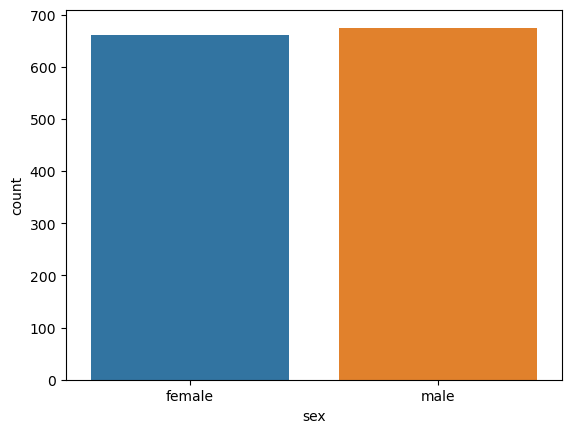

In [13]:
sns.countplot(data=df,x=df['sex'])  

**Insights**:

Male and Female Insurance holder are equal in ratio

<Axes: xlabel='smoker', ylabel='count'>

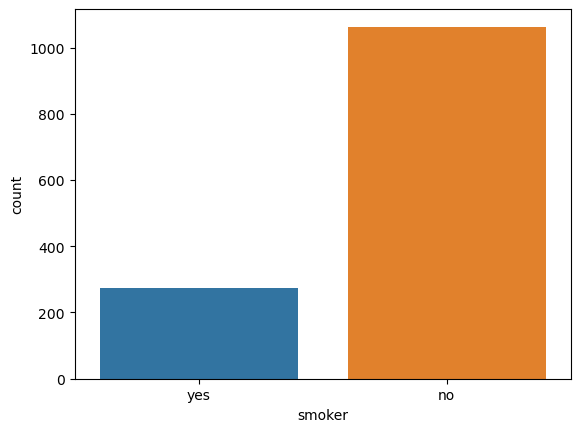

In [14]:
sns.countplot(data=df,x=df['smoker'])

**Insights**:

80 % of the insurance holders are non smokers.  
20 % of the insurance holders are smokers. 

<Axes: xlabel='region', ylabel='count'>

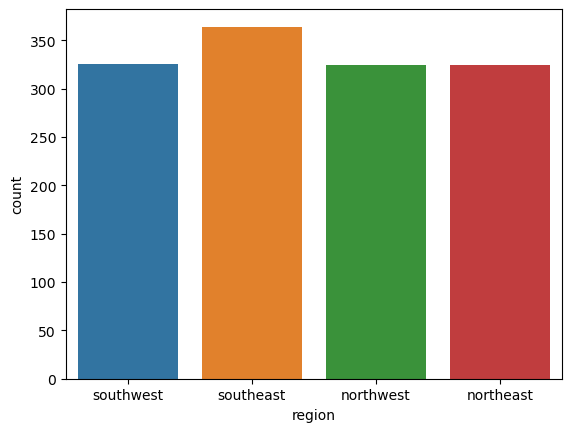

In [15]:
sns.countplot(data=df,x=df['region'])

**Insights**:
    
Southeast region insurance holders are more when compared with other regions

<Axes: xlabel='age', ylabel='Count'>

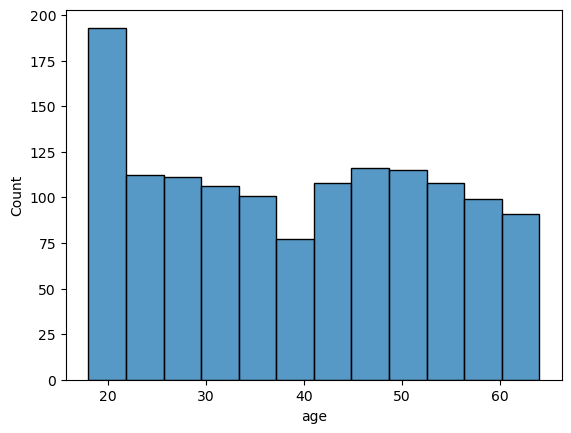

In [16]:
sns.histplot(data=df,x=df['age'])

**Insights**:
    
Most of the insurance holders having age in between 25 to 38 and also in between 45 to 60

<Axes: xlabel='children', ylabel='Count'>

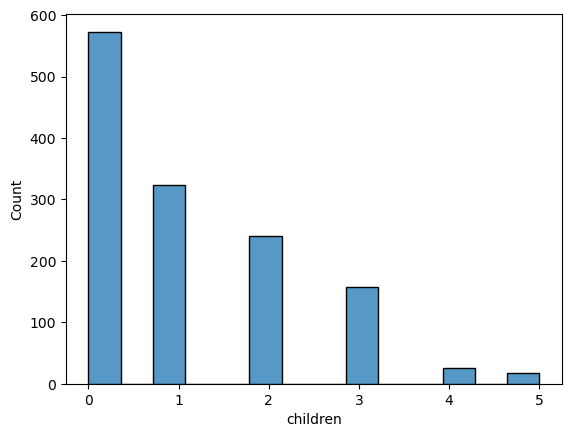

In [17]:
sns.histplot(data=df,x=df['children'])

**Insights**:

42 % of insurance holders does not have children.  
24 % of insurance holders are having 1 children.    
17 % of insurance holders are having 2 children.     
11 % of insurance holders are having 3 children.     
0.1 % of insurance holders are having 4 children.    
0.1 % of insurance holders are having 5 children.    

<Axes: xlabel='bmi', ylabel='Count'>

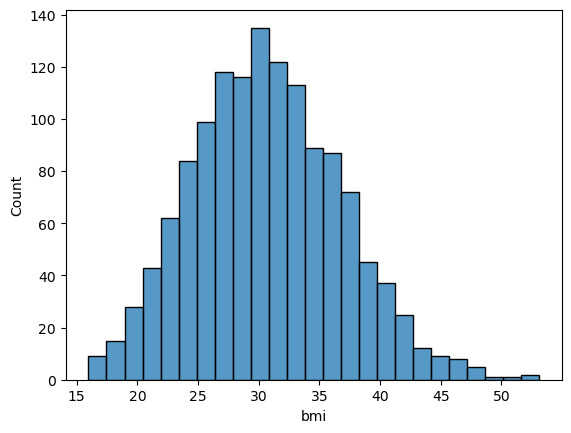

In [18]:
sns.histplot(data=df,x=df['bmi'])

**Insights**:

Most of the insurance holders having BMI in between 25 to 35.    
The insurance holders who are less than 25 and more than 42 are having less in number.  

In [19]:
import sweetviz as sv  # importing sweetviz visuvalization tool

                                             |                                             | [  0%]   00:00 ->…


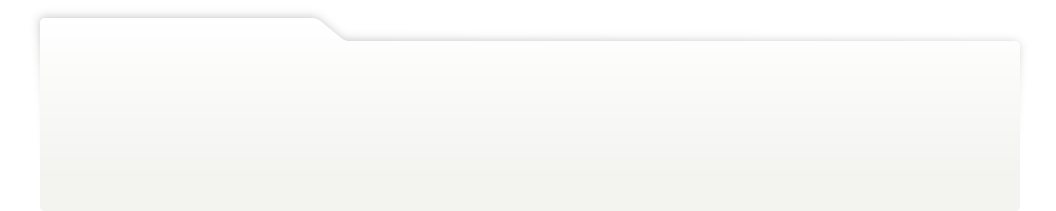
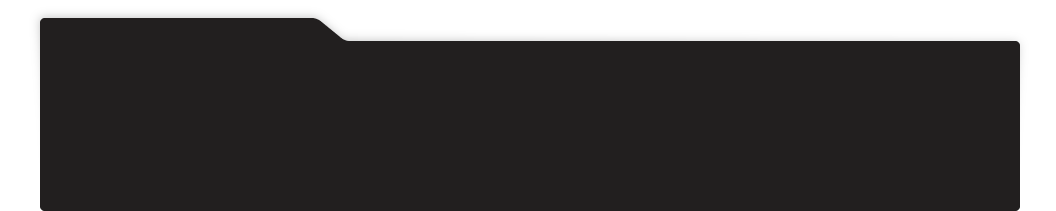
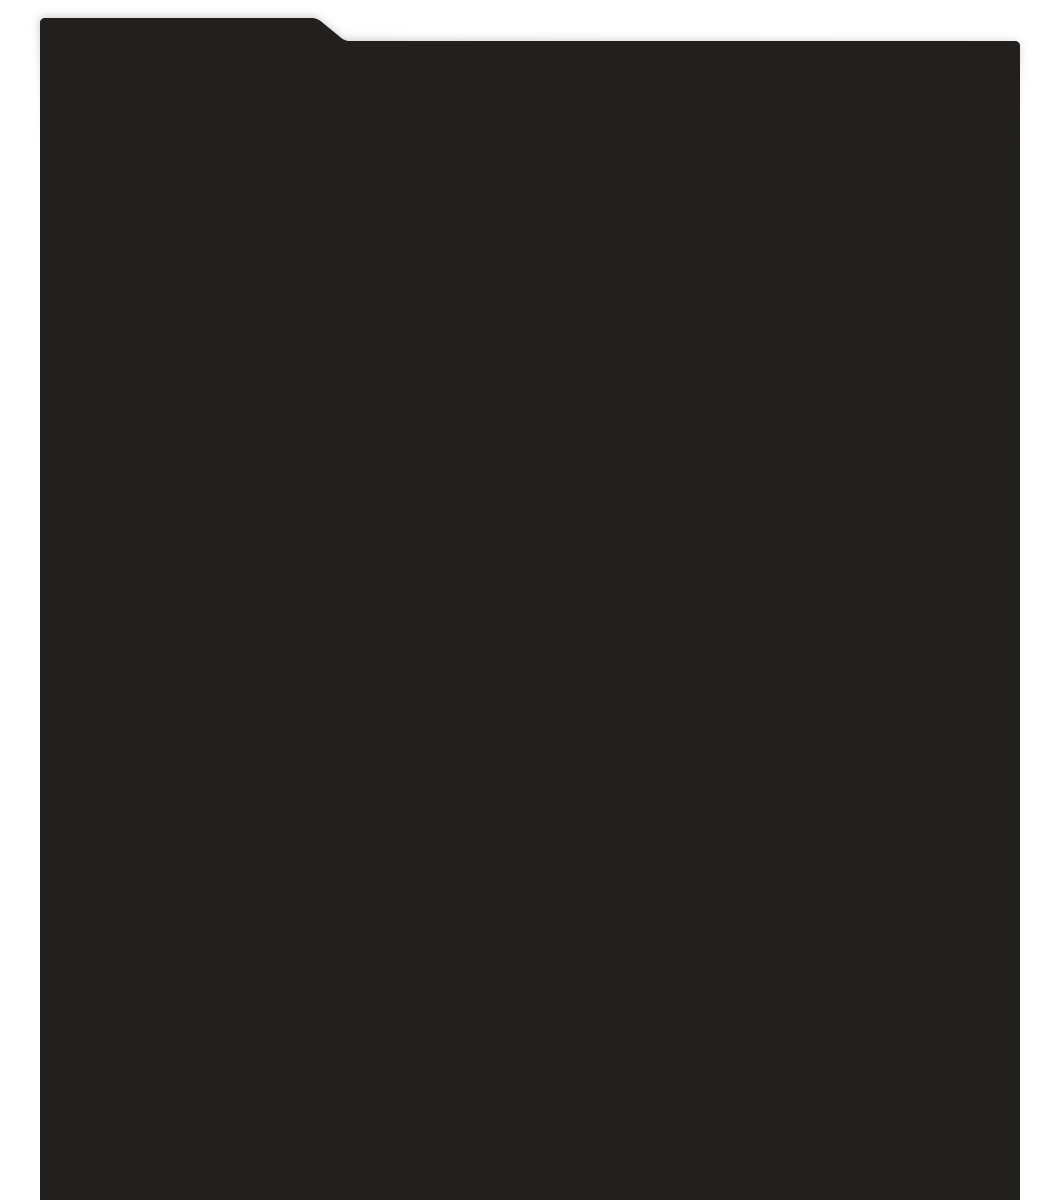
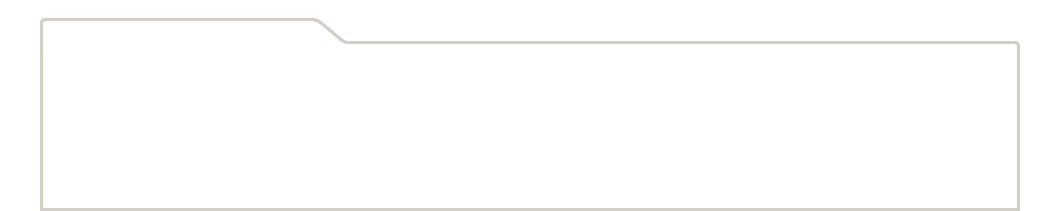
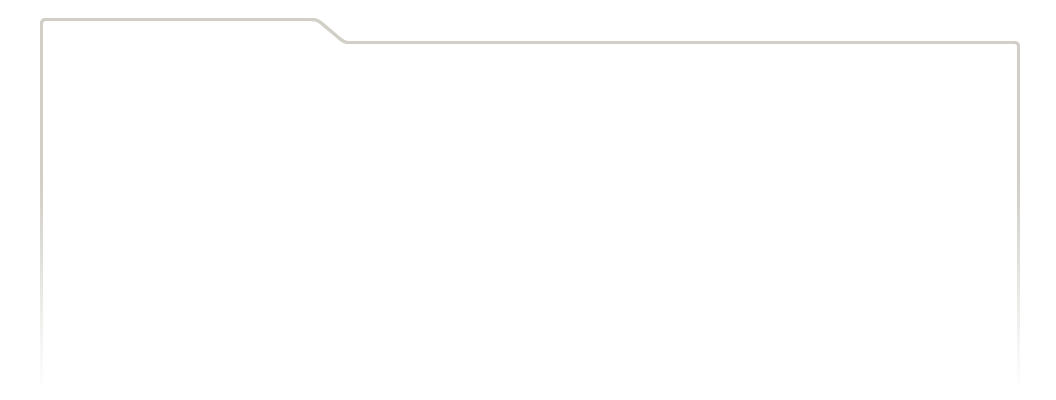
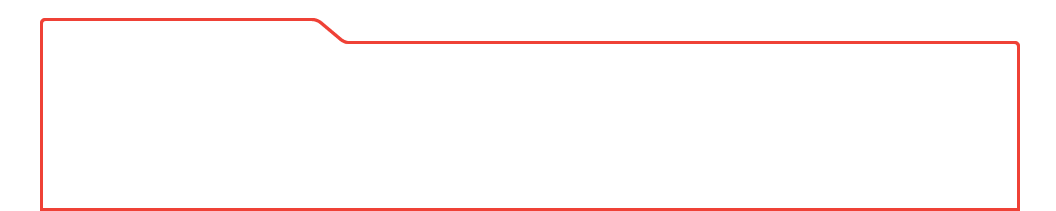
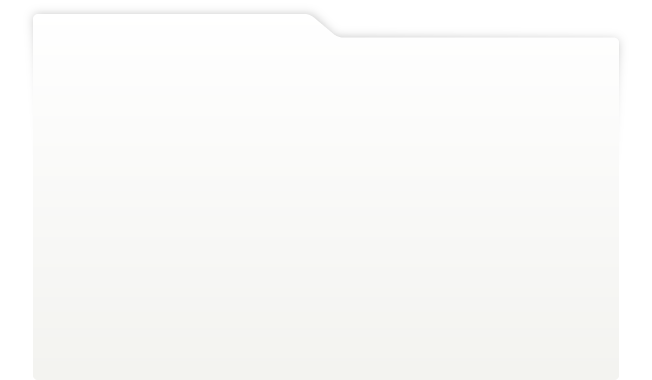
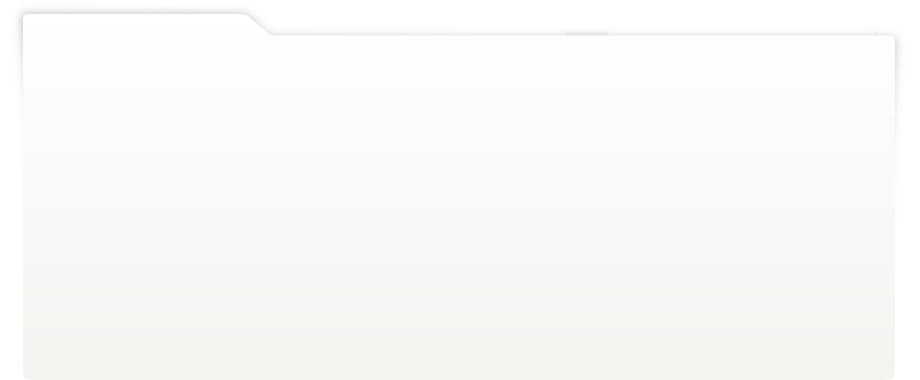
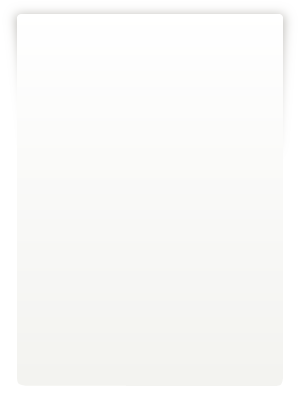
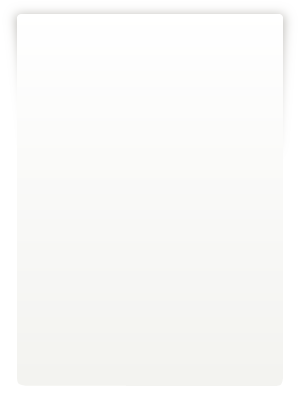
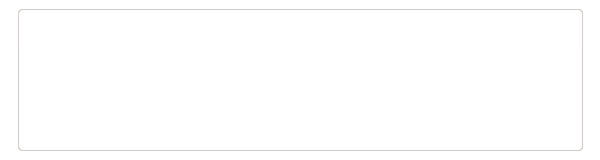
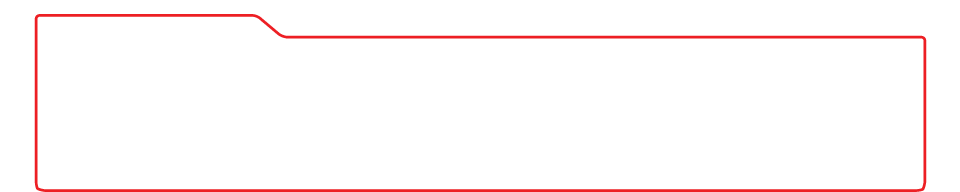
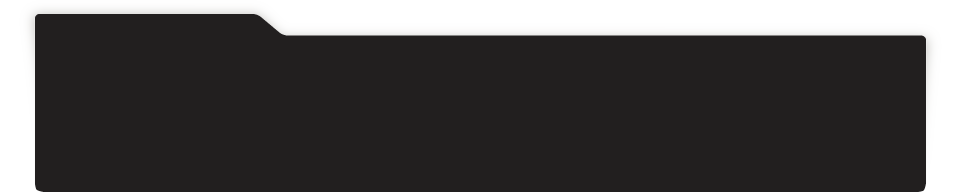
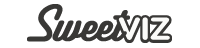
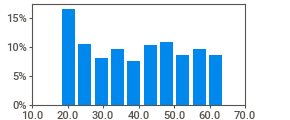
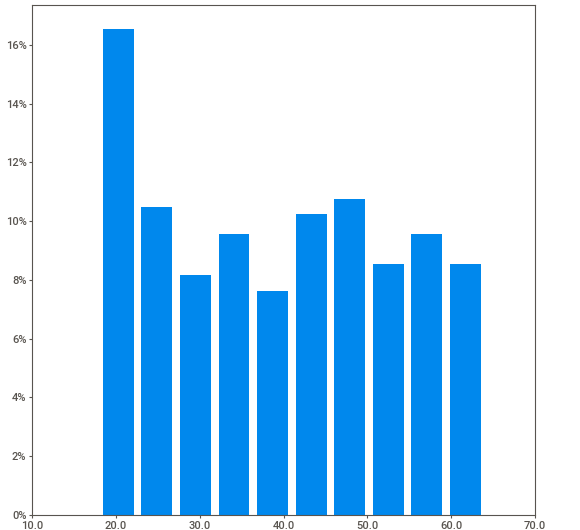
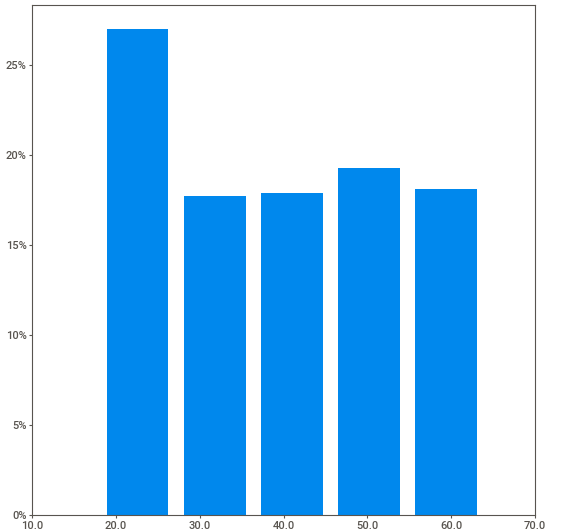
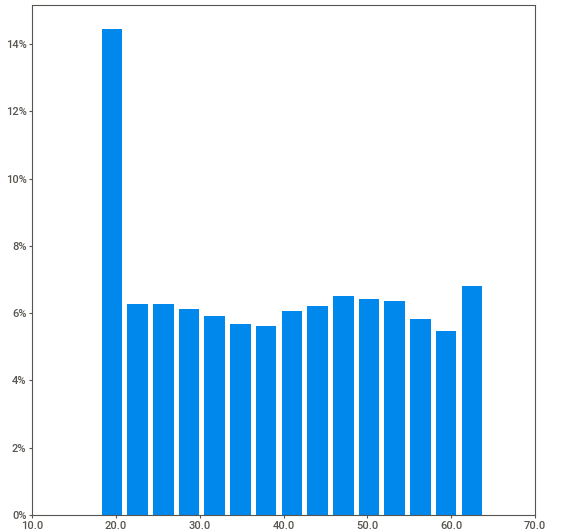
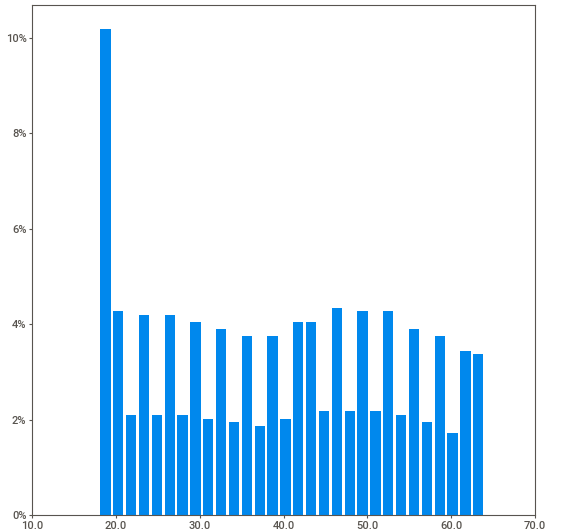
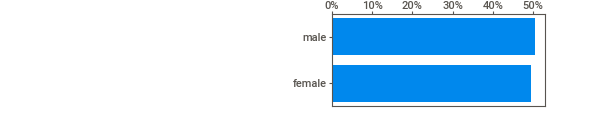
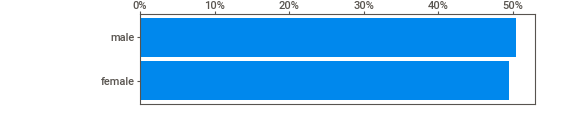
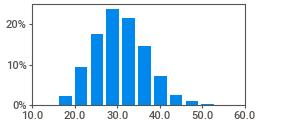
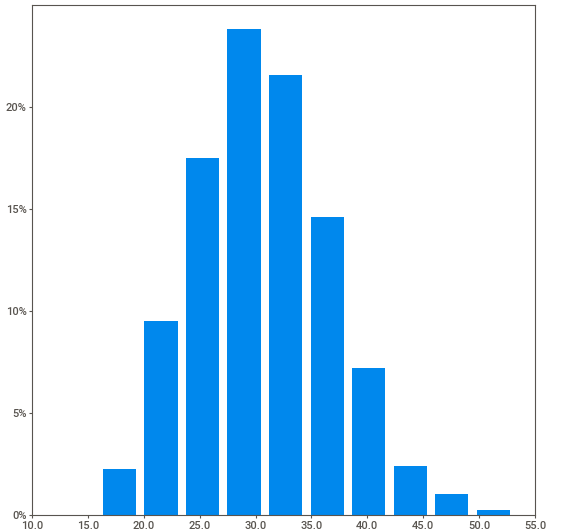
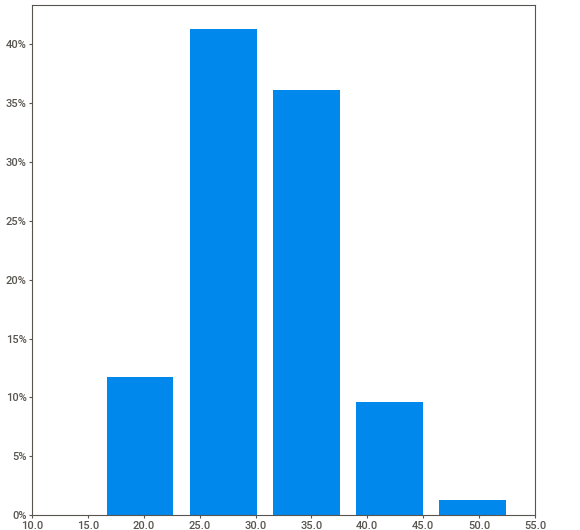
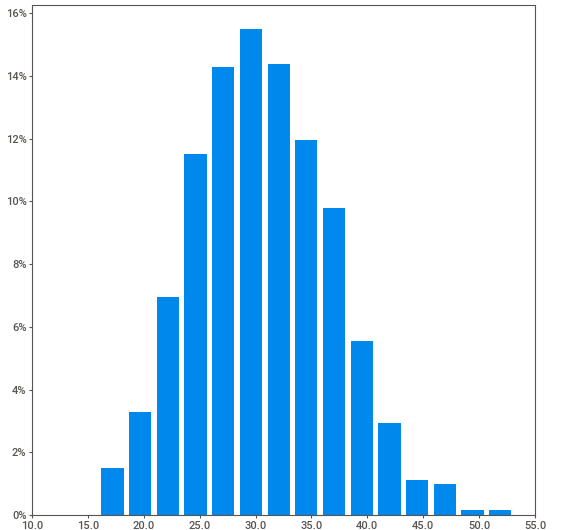
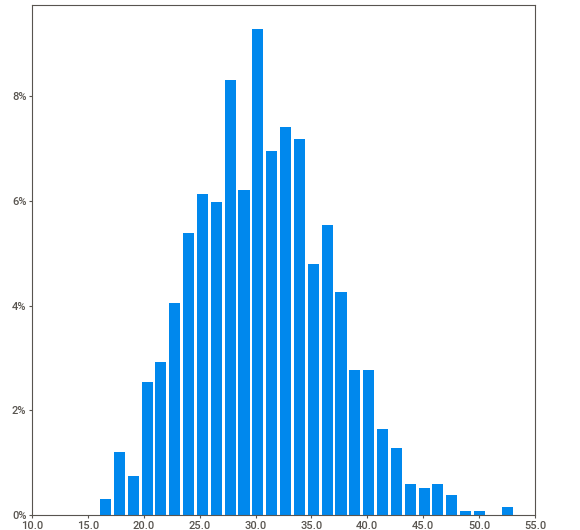
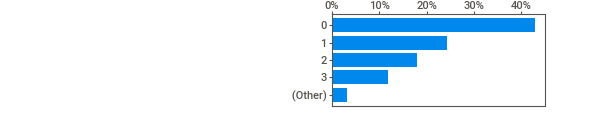
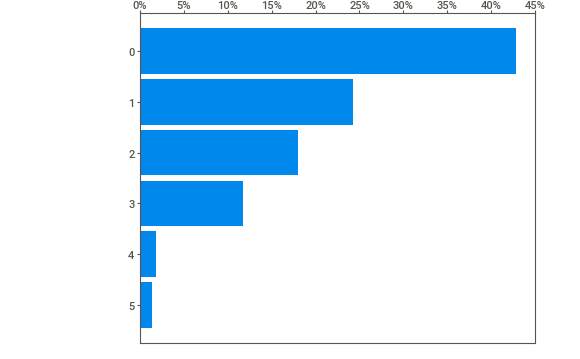
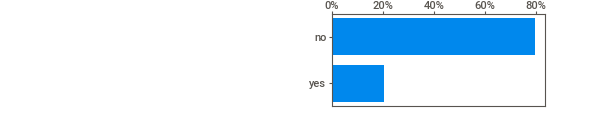
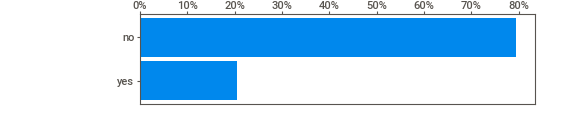
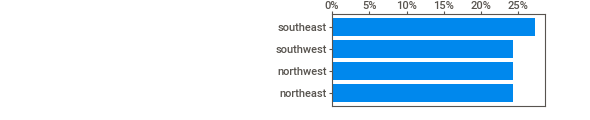
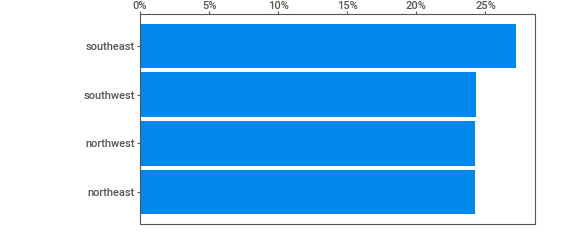
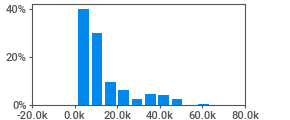
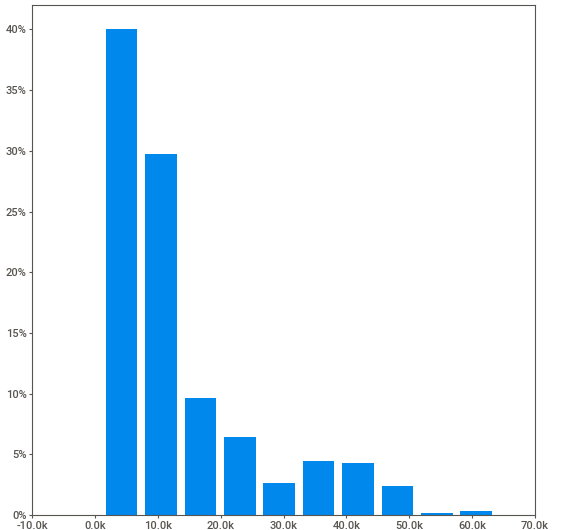
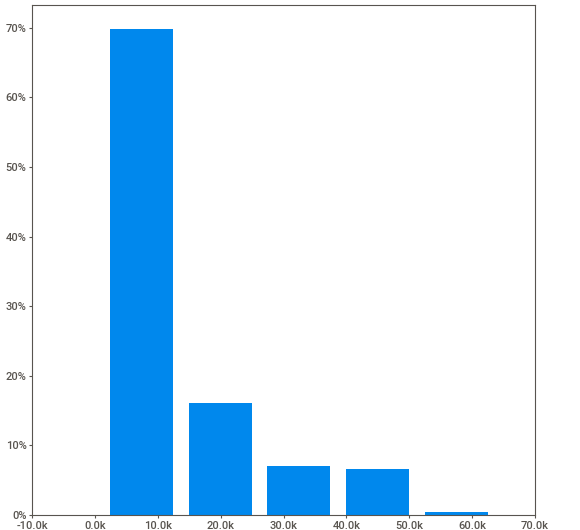
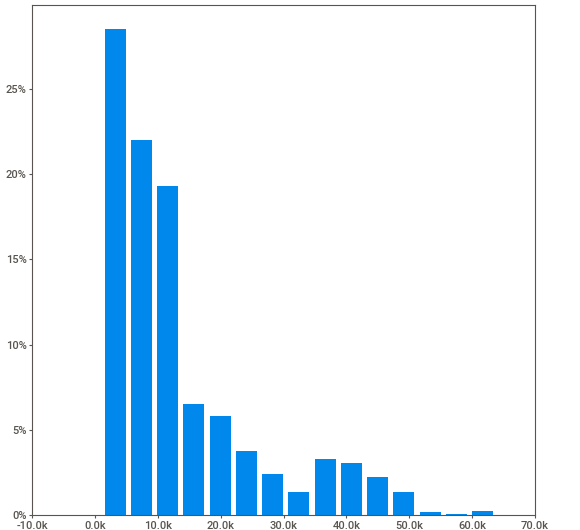
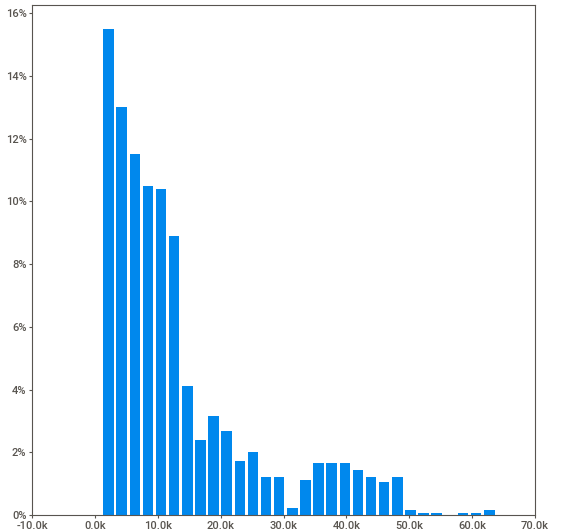
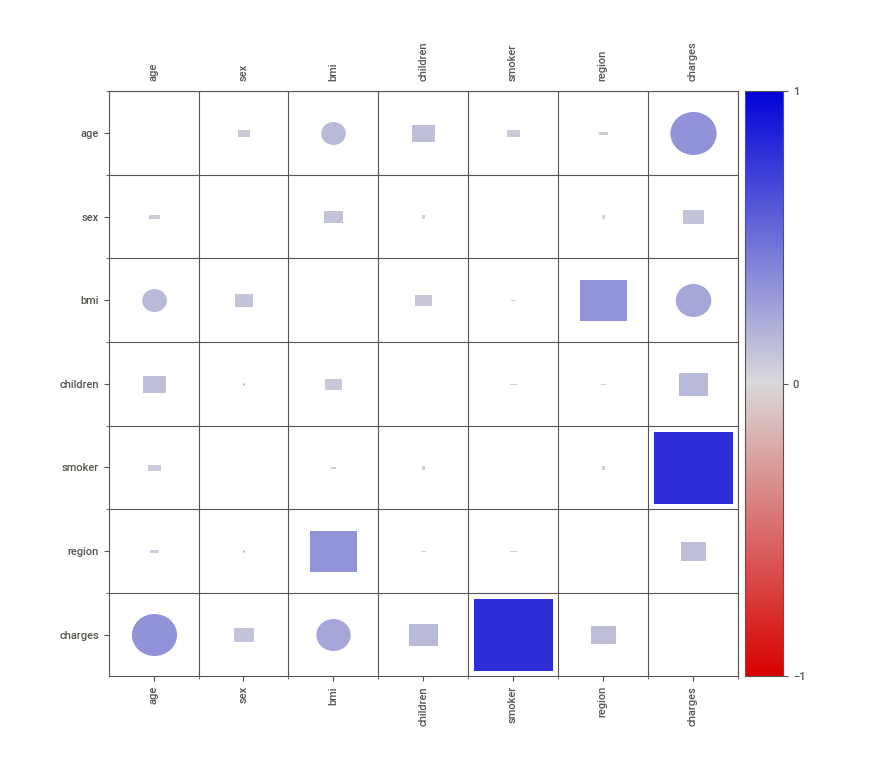
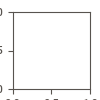

In [20]:
report=sv.analyze(df)
report.show_notebook()   # Detailed visuvalization of univariate analysis using sweetviz

## BiVariate Analysis

Bivariate analysis is a statistical method that examines the relationship between two variables.The variables are usually denoted by X and Y. One variable is dependent and the other is independent. The dependent variable depends on the independent variable.   

<Axes: xlabel='sex', ylabel='charges'>

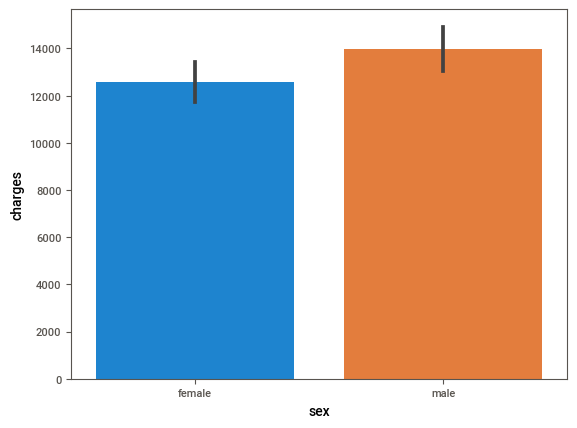

In [21]:
sns.barplot(x=df.sex,y=df.charges)

**Insights**:

Male insurance holders are more having Insurance Charges than Female insurance holders.

<Axes: xlabel='smoker', ylabel='charges'>

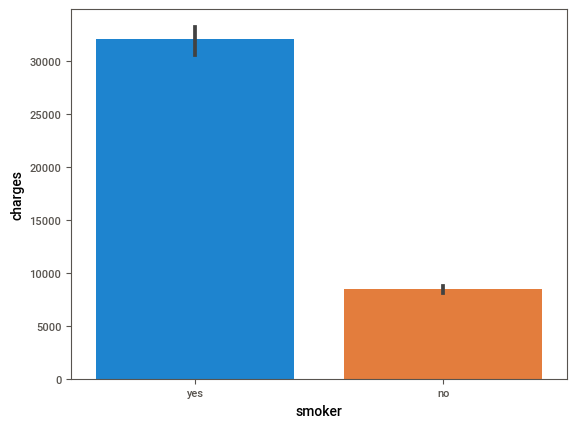

In [22]:
sns.barplot(x=df.smoker,y=df.charges)

**Insights**:
    
When comparing all insurance holders, smokers have higher insurance charges than nonsmokers.  

<Axes: xlabel='region', ylabel='charges'>

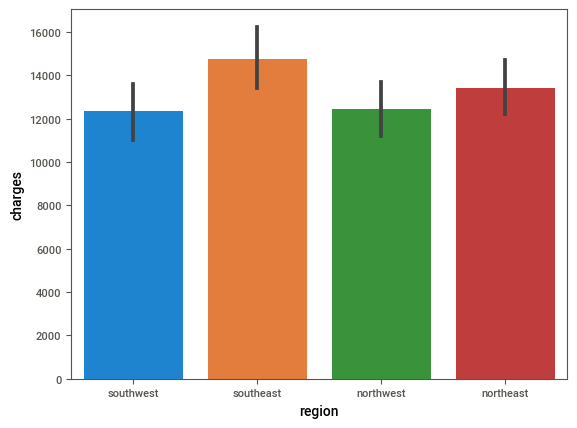

In [23]:
sns.barplot(x=df.region,y=df.charges)

**Insights**:

Insurance costs are higher in the Southeast than in other regions.  

<Axes: xlabel='age', ylabel='charges'>

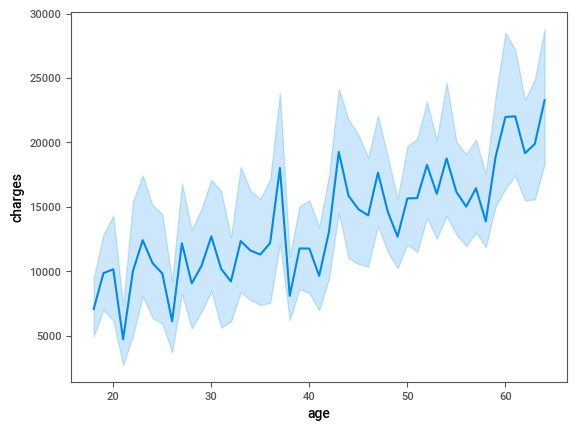

In [24]:
sns.lineplot(data=df,x=df.age,y=df.charges)

**Insights**:
    
As age increases the insurance charges also increasing non linearly

<Axes: xlabel='bmi', ylabel='charges'>

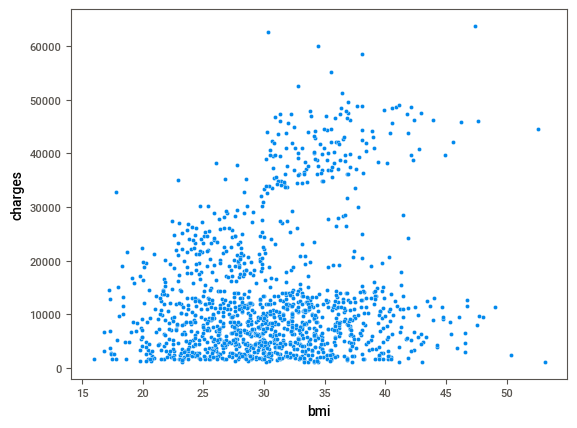

In [25]:
sns.scatterplot(data=df,x=df.bmi,y=df.charges)

**Insights**:
    
As BMI increases insurance charges are changing non linearly.  

<Axes: xlabel='children', ylabel='charges'>

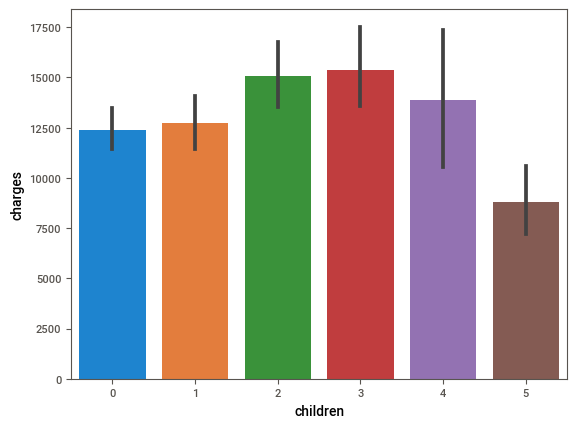

In [26]:
sns.barplot(data=df,x=df.children,y=df.charges)

**Insights**:
    
Among all insurance holders most of them having higher charges if they have more  than 1 children and less than 5 children. 

In [27]:
pd.pivot_table(df,index=['sex','smoker'],values=['charges'])

charges
sex    smoker              
female no       8762.297300
       yes     30678.996276
male   no       8099.700161
       yes     33042.005975

**Insights**: 
    
In both Male and Female the insurance holders who are smoking are paying higher charges than non smokers.   

Females who are non smokers are paying more charges than male who are non smokers.

In [28]:
pd.pivot_table(df,index=['smoker','region'],values=['charges'])

charges
smoker region                 
no     northeast   9165.531672
       northwest   8582.467101
       southeast   8032.216309
       southwest   8019.284513
yes    northeast  29673.536473
       northwest  30192.003182
       southeast  34844.996824
       southwest  32269.063494

**Insights**:

Among all regions for non smokers northeast region is having more insurance charges.    

Among smokers in all regions southeast region is having more insurance charges.  

In [29]:
pd.pivot_table(df,index=['region','sex'],values=['charges'])

charges
region    sex                 
northeast female  12953.203151
          male    13854.005374
northwest female  12479.870397
          male    12421.085553
southeast female  13499.669243
          male    15879.617173
southwest female  11274.411264
          male    13412.883576

**Insights**:

In northeast region male insurance holders are having more charges.  

In northwest region both male and female insurance holders are having equal charges.  

In southeast region male insurance holders are having more charges.  

In southwest region male insurance holders are having more charges.  

Among all male insurance holders in all regions southeast region male holders are paying more charges.  

Among all female insurance holders in all regions southeast region female holders are paying more charges.


In [30]:
pd.pivot_table(df,index=['children','age'],values=['charges'])

charges
children age              
0        18    6935.132360
         19   10386.309962
         20    7927.985929
         21    2856.296491
         22    5814.593892
...                    ...
5        43   14478.330150
         45    9788.865900
         46   10096.970000
         49   11552.904000
         52   12592.534500

[219 rows x 1 columns]

In [31]:
pd.pivot_table(df,index=['age','smoker'],values=['charges'])

charges
age smoker              
18  no       3215.162259
    yes     25473.730221
19  no       3575.430241
    yes     27001.232768
20  no       3673.112925
...                  ...
62  yes     37084.607312
63  no      14205.335706
    yes     40331.784380
64  no      15805.350545
    yes     39283.060036

[94 rows x 1 columns]

**Insights**:
    
As age increases the smokers are paying more charges compared to non smokers.

## Data Preprocessing

#### Handling Null Values


In [32]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Insights

There are no null values in the given dataset

## Conversion of Categorical data into numerical data

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [35]:
df.replace('male',1,inplace=True)

In [36]:
df.replace('female',0,inplace=True)

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [38]:
df.smoker.replace('yes',1,inplace=True)

In [39]:
df.smoker.replace('no',0,inplace=True)

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [41]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [42]:
df.region.replace(['northeast','northwest','southeast','southwest'],[0,1,2,3],inplace=True)

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
df.region.value_counts()

2    364
3    325
1    324
0    324
Name: region, dtype: int64

In [46]:
le=LabelEncoder()
df.region=le.fit_transform(df.region)

In [47]:
df.region.value_counts()

2    364
3    325
1    324
0    324
Name: region, dtype: int64

## Handling Outliers

<Axes: xlabel='age'>

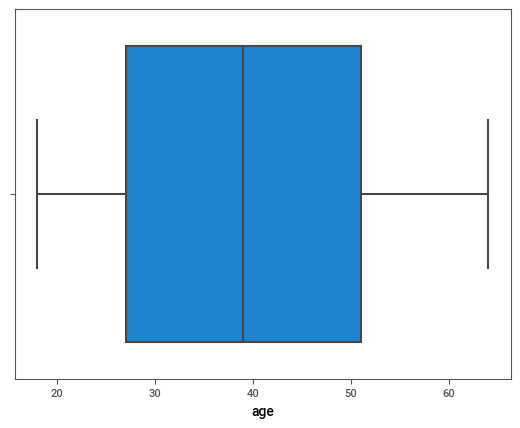

In [48]:
sns.boxplot(data=df,x=df.age)

<Axes: xlabel='bmi'>

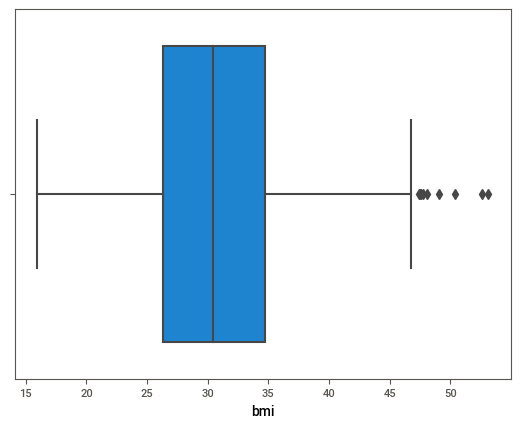

In [49]:
sns.boxplot(data=df,x=df.bmi)

In [50]:
q1=np.percentile(df.bmi,25)

In [51]:
q1

26.29

In [52]:
q3=np.percentile(df.bmi,75)
q3

34.7

In [53]:
IQR=q3-q1

In [54]:
UP=q3+1.5*IQR
LB=q1-1.5*IQR

UP

47.31500000000001

In [55]:
LB

13.674999999999994

In [56]:
def outliers1(feature):
    q1=np.percentile(df[feature],25)
    q3=np.percentile(df[feature],75)
    IQR=q3-q1
    UP=q3+1.5*IQR
    LB=q1-1.5*IQR
    return UP,LB

In [57]:
Upper_limit,Lower_limit=outliers1('bmi')

In [58]:
Upper_limit

47.31500000000001

In [59]:
Lower_limit

13.674999999999994

In [60]:
len(df.loc[df.bmi>52])

2

In [61]:
df.loc[df.bmi>52]

,age,sex,bmi,children,smoker,region,charges
1047,22,1,52.58,1,1,2,44501.3982
1317,18,1,53.13,0,0,2,1163.4627


In [62]:
df.loc[df.bmi>Upper_limit,'bmi']=np.median(df.bmi)

<Axes: xlabel='bmi'>

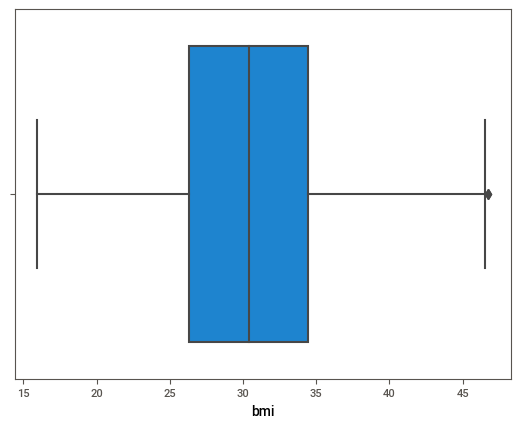

In [63]:
sns.boxplot(data=df,x=df.bmi)

Above bmi box plot outliers are valid outliers after dropping the unnecessary outliers.

#### Feature Selection using Heat Map

<Axes: >

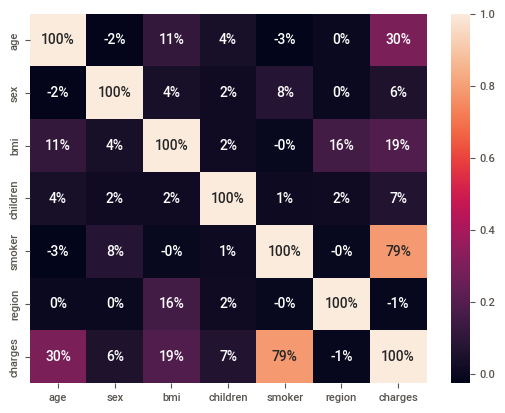

In [64]:
sns.heatmap(df.corr(),annot=True,fmt='.0%')

**Insights**:

There is no perfect correlation among independent features

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Model Creation -- Linear Regression

In [66]:
# data set seperation
X=df.drop('charges',axis=1)
Y=df.charges

In [67]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [68]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [69]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=33)

In [70]:
ss=StandardScaler()

In [71]:
ss_x_train=ss.fit_transform(x_train)

In [72]:
ss_x_test=ss.transform(x_test)

In [73]:
lr=LinearRegression()

In [74]:
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
y_pred=lr.predict(x_test)

In [76]:
y_pred_train=lr.predict(x_train)

In [77]:
r2=r2_score(y_test,y_pred)

In [78]:
r2

0.740635110254075

In [79]:
r2_train=r2_score(y_train,y_pred_train)
r2_train

0.7507842831993116

In [80]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.740635110254075
4174.294087134666
5969.419083613173


In [81]:
scores=cross_val_score(lr, X, Y , cv=5,scoring='r2')
print(scores)

[0.7621298  0.71211942 0.7692158  0.7270603  0.75845791]


In [82]:
np.mean(scores)

0.7457966456359179

In [83]:
la=Lasso()
ri=Ridge()

In [84]:
la.fit(ss_x_train,y_train)

Lasso()

In [85]:
y_pred_lasso=la.predict(ss_x_test)

In [86]:
r2_score1=r2_score(y_test,y_pred_lasso)
r2_score1

0.740658026719031

In [87]:
print(r2_score(y_test,y_pred_lasso))
print(mean_absolute_error(y_test,y_pred_lasso))
print(np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

0.740658026719031
4174.1691615823165
5969.1553605525105


In [88]:
ri.fit(ss_x_train,y_train)
y_pred_ridge=ri.predict(ss_x_test)
r2_score1=r2_score(y_test,y_pred_ridge)
r2_score1

0.7407391738666271

In [89]:
ss_x_train

array([[ 0.61704235, -1.01413165, -0.57611754, -0.06390525, -0.50321359,
        -1.36760012],
       [ 0.11722335,  0.98606527,  1.6292446 , -0.90729677, -0.50321359,
         0.45076372],
       [-0.6682065 ,  0.98606527, -0.88244141, -0.90729677, -0.50321359,
        -1.36760012],
       ...,
       [ 0.90265321,  0.98606527, -0.07802305, -0.06390525, -0.50321359,
         1.35994564],
       [-1.45363636, -1.01413165,  1.1489695 , -0.90729677, -0.50321359,
        -0.4584182 ],
       [ 0.26002878, -1.01413165, -1.01141988,  0.77948627,  1.98722774,
        -0.4584182 ]])

In [90]:
print(r2_score(y_test,y_pred_ridge))
print(mean_absolute_error(y_test,y_pred_ridge))
print(np.sqrt(mean_squared_error(y_test,y_pred_ridge)))

0.7407391738666271
4174.721333450806
5968.221424134428


## Model Creation -- K Nearest Neighbours Regressor 

In [91]:
ERROR_RATE = []

for i in range(1,13):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(ss_x_train, y_train)
    y_pred = knn.predict(ss_x_test)
    error_rate = mean_squared_error(y_test,y_pred)
    ERROR_RATE.append(error_rate)

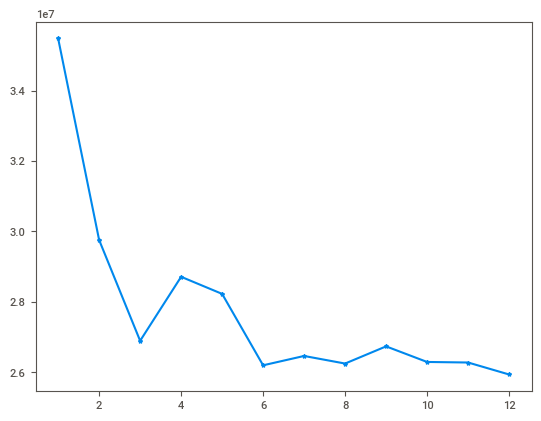

In [92]:
plt.plot(range(1,13), ERROR_RATE, marker = '*')

In [93]:
knn=KNeighborsRegressor(n_neighbors=7)

In [94]:
knn.fit(ss_x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [95]:
y_pred_knn=knn.predict(ss_x_test)

In [96]:
y_pred_knn_train=knn.predict(ss_x_train)

In [97]:
r2_score_knn=r2_score(y_test,y_pred_knn)

In [98]:
r2_score_knn

0.8074040949128852

In [99]:
r2_score_knn_train=r2_score(y_train,y_pred_knn_train)

In [100]:
r2_score_knn_train

0.8581968792749555

In [101]:
print(r2_score(y_test,y_pred_knn))
print(mean_absolute_error(y_test,y_pred_knn))
print(np.sqrt(mean_squared_error(y_test,y_pred_knn)))

0.8074040949128852
3251.507754090085
5143.988648722213


## Model Creation - Decision Tree Regressor

In [102]:
dcr=DecisionTreeRegressor()

In [103]:
dcr.fit(x_train,y_train)

DecisionTreeRegressor()

In [104]:
y_pred_dcr=dcr.predict(x_test)
y_pred_dcr_train=dcr.predict(x_train)

In [105]:
r2_score_dcr=r2_score(y_test,y_pred_dcr)
r2_score_dcr

0.7447544050707358

In [106]:
r2_score_dcr_train=r2_score(y_train,y_pred_dcr_train)
r2_score_dcr_train

0.9983575994486799

#### Hyper Parameter Tuning

In [107]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [108]:
grid=GridSearchCV(estimator=dcr,param_grid=param_grid_dt,scoring='r2',cv=5,verbose=3,n_jobs=-1)

In [109]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=3)

In [110]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [111]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)

In [112]:
grid.best_score_

0.8342527938137863

In [113]:
dcr_gs=grid.best_estimator_

In [114]:
y_pred_dcr_gs=dcr_gs.predict(x_test)
y_pred_dcr_train_gs=dcr_gs.predict(x_train)

In [115]:
r2_score_dcr_gs=r2_score(y_test,y_pred_dcr_gs)
r2_score_dcr_gs

0.8635962608563715

In [116]:
r2_score_dcr_gs_train=r2_score(y_train,y_pred_dcr_train_gs)
r2_score_dcr_gs_train

0.8768975658724464

In [117]:
# Decision Tree using Scaled data frame

In [118]:
dcr_gs.fit(ss_x_train,y_train)
y_pred_dcr_gs_ss=dcr_gs.predict(ss_x_test)
y_pred_dcr_gs_train_ss=dcr_gs.predict(ss_x_train)
r2_score_dcr_gs_ss=r2_score(y_test,y_pred_dcr_gs_ss)
r2_score_dcr_gs_ss

0.8629237404815813

In [119]:
r2_score_dcr_gs_train_ss=r2_score(y_train,y_pred_dcr_gs_train_ss)
r2_score_dcr_gs_train_ss

0.8768975658724464

In [120]:
print(r2_score(y_test,y_pred_dcr_gs_ss))
print(mean_absolute_error(y_test,y_pred_dcr_gs_ss))
print(np.sqrt(mean_squared_error(y_test,y_pred_dcr_gs_ss)))

0.8629237404815813
2553.135056135808
4339.678930237267


## Model Creation -- Random Forest Regressor

In [121]:
rfr=RandomForestRegressor()

In [122]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [123]:
y_pred_rfr=rfr.predict(x_test)
y_pred_rfr_train=rfr.predict(x_train)

In [124]:
r2_score_rfr=r2_score(y_test,y_pred_rfr)
r2_score_rfr

0.8581609357392005

In [125]:
r2_score_rfr_train=r2_score(y_train,y_pred_rfr_train)
r2_score_rfr_train

0.9760566675509472

#### Hyper Parameter Tuning

In [126]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [127]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [128]:
best_rf = grid_search.best_estimator_
y_pred_rfr_hyp = best_rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 25934642.563984763


In [129]:
r2_score_rfr_hyp=r2_score(y_test,y_pred_rfr_hyp)
r2_score_rfr_hyp

0.8696858696419132

In [130]:
y_pred_rfr_hyp_train = best_rf.predict(x_train)

In [131]:
r2_score_rfr_hyp_train=r2_score(y_train,y_pred_rfr_hyp_train)
r2_score_rfr_hyp_train

0.9100015106476995

In [132]:
print(r2_score(y_test,y_pred_rfr_hyp))
print(mean_absolute_error(y_test,y_pred_rfr_hyp))
print(np.sqrt(mean_squared_error(y_test,y_pred_rfr_hyp)))

0.8696858696419132
2427.2996346851683
4231.284548830021


## Model Creation -- Extreme Gradient Boosting Regressor

In [133]:
xgr=XGBRegressor()

In [134]:
xgr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [135]:
y_pred_xgr=xgr.predict(x_test)
y_pred_xgr_train=xgr.predict(x_train)

In [136]:
r2_score_xgr=r2_score(y_test,y_pred_xgr)
r2_score_xgr

0.8183461299613484

In [137]:
r2_score_xgr_train=r2_score(y_train,y_pred_xgr_train)
r2_score_xgr_train

0.9940020712547933

#### Hyper Parameter Tuning

In [138]:
# define models and parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


grid_search_xgb = GridSearchCV(estimator=xgr, param_grid=param_grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

In [139]:
grid_search_xgb.fit(x_train, y_train)

Fitting 2 folds for each of 243 candidates, totalling 486 fits


GridSearchCV(cv=2, error_score=0,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learni...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='r2', verbose=2)

In [140]:
grid_search_xgb_est=grid_search_xgb.best_estimator_

In [141]:
grid_search_xgb.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 1.0}

In [142]:
grid_search_xgb.best_score_

0.8476805834142733

In [143]:
y_pred_xgr_hyp=grid_search_xgb_est.predict(x_test)

In [144]:
y_pred_xgr_hyp_train=grid_search_xgb_est.predict(x_train)

In [145]:
r2_score_xgr_hyp=r2_score(y_test,y_pred_xgr_hyp)
r2_score_xgr_hyp

0.8699026794110971

In [146]:
r2_score_xgr_train_hyp=r2_score(y_train,y_pred_xgr_hyp_train)
r2_score_xgr_train_hyp

0.8818101497959936

In [147]:
print(r2_score(y_test,y_pred_xgr_hyp))
print(mean_absolute_error(y_test,y_pred_xgr_hyp))
print(np.sqrt(mean_squared_error(y_test,y_pred_xgr_hyp)))

0.8699026794110971
2368.073067676131
4227.763189652371


## Model Creation --- Stochastic Gradient Descent Regressor

In [148]:
sgd_regressor = SGDRegressor(max_iter=1000, random_state=42)
sgd_regressor.fit(ss_x_train, y_train)
y_pred_sgd = sgd_regressor.predict(ss_x_test)

In [149]:
r2_score_sgd = r2_score(y_test, y_pred_sgd)
r2_score_sgd

0.7413763190118616

In [150]:
y_pred_sgd_train=sgd_regressor.predict(ss_x_train)
r2_score_sgd_train = r2_score(y_train, y_pred_sgd_train)
r2_score_sgd_train

0.7507618279147115

#### Hyper Parameter Tuning

In [151]:
pipeline = Pipeline([
    ('regressor', SGDRegressor(max_iter=1000, random_state=42))  
])
# Define the hyperparameters and their possible values
param_grid = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],
    'regressor__learning_rate': ['constant', 'optimal', 'invscaling'],
    'regressor__eta0': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(ss_x_train, y_train)
# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_
y_pred_sgd_hyp = best_model.predict(ss_x_test)


Best Hyperparameters: {'regressor__alpha': 0.01, 'regressor__eta0': 0.01, 'regressor__learning_rate': 'invscaling'}


In [152]:
r2_score_sgd_hyp = r2_score(y_test, y_pred_sgd_hyp)
print("r2 score", r2_score_sgd_hyp)

r2 score 0.7413903011523585


In [153]:
y_pred_sgd_hyp_train = best_model.predict(ss_x_train)

In [154]:
r2_score_sgd_hyp_train = r2_score(y_train, y_pred_sgd_hyp_train)
r2_score_sgd_hyp_train

0.7506995611120962

In [155]:
print(r2_score(y_test,y_pred_sgd_hyp))
print(mean_absolute_error(y_test,y_pred_sgd_hyp))
print(np.sqrt(mean_squared_error(y_test,y_pred_sgd_hyp)))

0.7413903011523585
4177.306746128702
5960.722190858243


## Model Creation --- Ada Boost Regressor

In [156]:
base_regressor = DecisionTreeRegressor(max_depth=1)
ada_boost_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, random_state=42)
ada_boost_regressor.fit(x_train, y_train)
y_pred_ada = ada_boost_regressor.predict(x_test)
y_pred_ada_train = ada_boost_regressor.predict(x_train)

In [157]:
r2_score_ada = r2_score(y_test, y_pred_ada)
r2_score_ada

0.5582137466607618

In [158]:
r2_score_ada = r2_score(y_test, y_pred_ada)
r2_score_ada

0.5582137466607618

In [159]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(ada_boost_regressor, param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1),
                                         random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [160]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [161]:
best_adaboost = grid_search.best_estimator_

In [162]:
y_pred_ada_hyp = best_adaboost.predict(x_test)
r2_score_ada_hyp=r2_score(y_test,y_pred_ada_hyp)
r2_score_ada_hyp

0.6018483830667063

In [163]:
y_pred_ada_hyp_train = best_adaboost.predict(x_train)
r2_score_ada_hyp_train=r2_score(y_train,y_pred_ada_hyp_train)
r2_score_ada_hyp_train

0.6230963159911194

In [164]:
print(r2_score(y_test,y_pred_ada_hyp))
print(mean_absolute_error(y_test,y_pred_ada_hyp))
print(np.sqrt(mean_squared_error(y_test,y_pred_ada_hyp)))

0.6018483830667063
5708.7566331658845
7396.0649937967255


## Conclusions:

#### Linear Regression Model:

r2_score : 0.740635110254075

MAE(mean_absolute_score): 4174.294087134666

MSE(mean_squared_error) : 5969.419083613173

The Linear Regression model shows moderate performance in explaining the variance in the data. The mean absolute error (MAE) and mean squared error (MSE) values are relatively high, indicating that the model might not fit the data well.

#### K Nearest Neighbors Regressor Model:

r2_score : 0.8074040949128852

MAE(mean_absolute_score): 3251.507754090085

MSE(mean_squared_error) :5143.988648722213

The K Nearest Neighbors Regressor model demonstrates good performance, with a higher R2 score compared to linear regression. The lower MAE and MSE values suggest better accuracy and fit to the data.

#### Decision Tree Regression Model:

r2_score : 0.8629237404815813

MAE(mean_absolute_score): 2553.135056135807

MSE(mean_squared_error) : 4339.678930237266

The Decision Tree Regression model outperforms both Linear Regression and K Nearest Neighbors models, showing a higher 
R2 score and lower MAE and MSE values. It captures more variance in the data and provides a better fit.
  
#### Random Forest Regression Model:

r2_score : 0.8696858696419132

MAE(mean_absolute_score): 2400.377477477522

MSE(mean_squared_error) : 4199.942066268206

The Random Forest Regression model improves upon the Decision Tree model, achieving a higher R2 score and lower MAE and MSE values. It indicates a better overall fit to the data.

#### Extreme Gradient Boosting Regression Model:

r2_score : 0.8699026794110971

MAE(mean_absolute_score):2368.073067676131

MSE(mean_squared_error) : 4227.763189652371

The Extreme Gradient Boosting Regression model performs similarly to Random Forest, with a high R2 score and low MAE and MSE values. It suggests a robust fit to the data

#### Stochastic Gradient Descent Regressor Model:

r2_score :0.7413903011523585

MAE(mean_absolute_score): 4177.306746128702

MSE(mean_squared_error) : 5960.722190858243

Similar to Linear Regression, the Stochastic Gradient Descent model shows moderate performance but does not outperform other models. The R2 score is comparable, and MAE and MSE values are relatively high.

#### Ada Boost Regressor Model:

r2_score : 0.6018483830667063

MAE(mean_absolute_score): 5708.7566331658845

MSE(mean_squared_error) : 7396.0649937967255

The Ada Boost Regressor model demonstrates the lowest performance among the models considered, with a lower R2 score and higher MAE and MSE values. It may not be the most suitable model for this dataset.

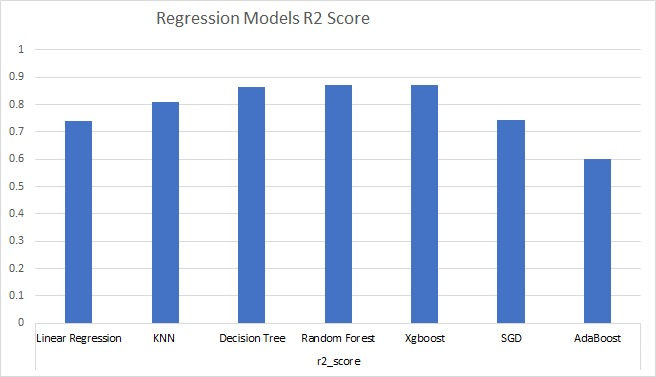

Based on the provided evaluation metrics, it appears that the Random Forest Regression Model and the Extreme Gradient Boosting Regression Model are the top-performing models. Both models have similar R2 scores and low values for Mean Absolute Error (MAE) and Mean Squared Error (MSE).  
In conclusion, both Random Forest and Extreme Gradient Boosting are strong contenders, and the choice between them may depend on computational considerations, interpretability, and the specific characteristics of your data.We can choose Random Forest Regressor Model for the Given data set.